In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Get the current directory and the processed directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
processed_dir = os.path.join(parent_dir, 'processed')

# Get the list of pickle files in the processed directory
pklfiles = [f for f in os.listdir(processed_dir) if f.endswith('.pkl')]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through each pickle file
for pklfile in pklfiles:
    # Read the data from the pickle file
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))
    
    # Combine the data with the existing data
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# Sort the combined data by filename
combined_data = combined_data.sort_values(by='filename')



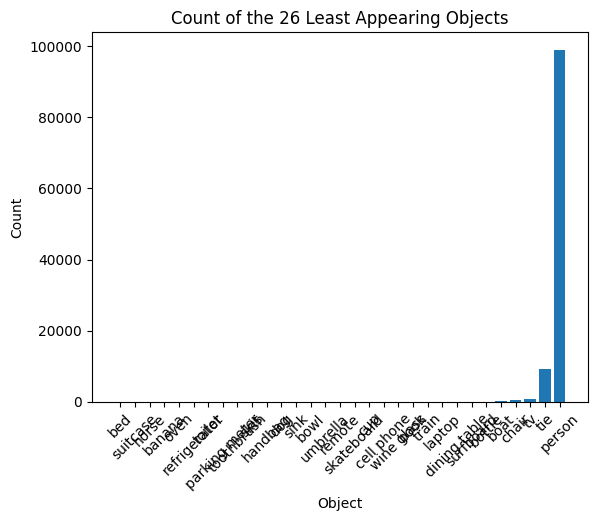

img00001.jpeg
img00002.jpeg
img00003.jpeg
img00004.jpeg
img00005.jpeg
img00006.jpeg
img00007.jpeg
img00008.jpeg
img00009.jpeg
img00010.jpeg
img00011.jpeg
img00012.jpeg
img00013.jpeg
img00014.jpeg
img00015.jpeg
img00016.jpeg
img00017.jpeg
img00018.jpeg
img00019.jpeg
img00020.jpeg
img00021.jpeg
img00022.jpeg
img00023.jpeg
img00024.jpeg
img00025.jpeg
img00026.jpeg
img00027.jpeg
img00028.jpeg
img00029.jpeg
img00030.jpeg
img00031.jpeg
img00032.jpeg
img00033.jpeg
img00034.jpeg
img00035.jpeg
img00036.jpeg
img00037.jpeg
img00038.jpeg
img00039.jpeg
img00040.jpeg
img00041.jpeg
img00042.jpeg
img00043.jpeg
img00044.jpeg
img00045.jpeg
img00046.jpeg
img00047.jpeg
img00048.jpeg
img00049.jpeg
img00050.jpeg
img00051.jpeg
img00052.jpeg
img00053.jpeg
img00054.jpeg
img00055.jpeg
img00056.jpeg
img00057.jpeg
img00058.jpeg
img00059.jpeg
img00060.jpeg
img00061.jpeg
img00062.jpeg
img00063.jpeg
img00064.jpeg
img00065.jpeg
img00066.jpeg
img00067.jpeg
img00068.jpeg
img00069.jpeg
img00070.jpeg
img00071.jpeg
img000

In [43]:
# Extract object labels
import seaborn as sns

all_detections = [detection for detections in combined_data['detections'] for detection in detections]
labels = [detection[4] for detection in all_detections]

# Count occurrences of each label
label_counts = pd.Series(labels).value_counts()

# Get the 26 least appearing objects
least_appearing_objects = label_counts.nsmallest(31)

# Plot histogram for the 26 least appearing objects
plt.bar(least_appearing_objects.index, least_appearing_objects.values)
plt.xlabel('Object')
plt.ylabel('Count')
plt.title('Count of the 26 Least Appearing Objects')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

# Initialize an empty dictionary to store the mapping
object_frame_mapping = {}

# Iterate through each pickle file again
for pklfile in pklfiles:
    # Read the data from the pickle file
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))
    data = data.sort_values(by='filename')
    # Iterate through each detection in the data
    for index, row in data.iterrows():
        print(row['filename'])
        filename = pklfile[:-4]  # Remove the '.pkl' extension to get the video name
        detections = row['detections']
        
        
        for frame_number, detection in enumerate(detections, start=1):
            object_label = detection[4]
            
            
            if object_label in least_appearing_objects.index:
                # Add the video name and frame number to the dictionary
                if object_label not in object_frame_mapping:
                    object_frame_mapping[object_label] = []
                object_frame_mapping[object_label].append((filename, row['filename']))

# Print the dictionary
print(object_frame_mapping)



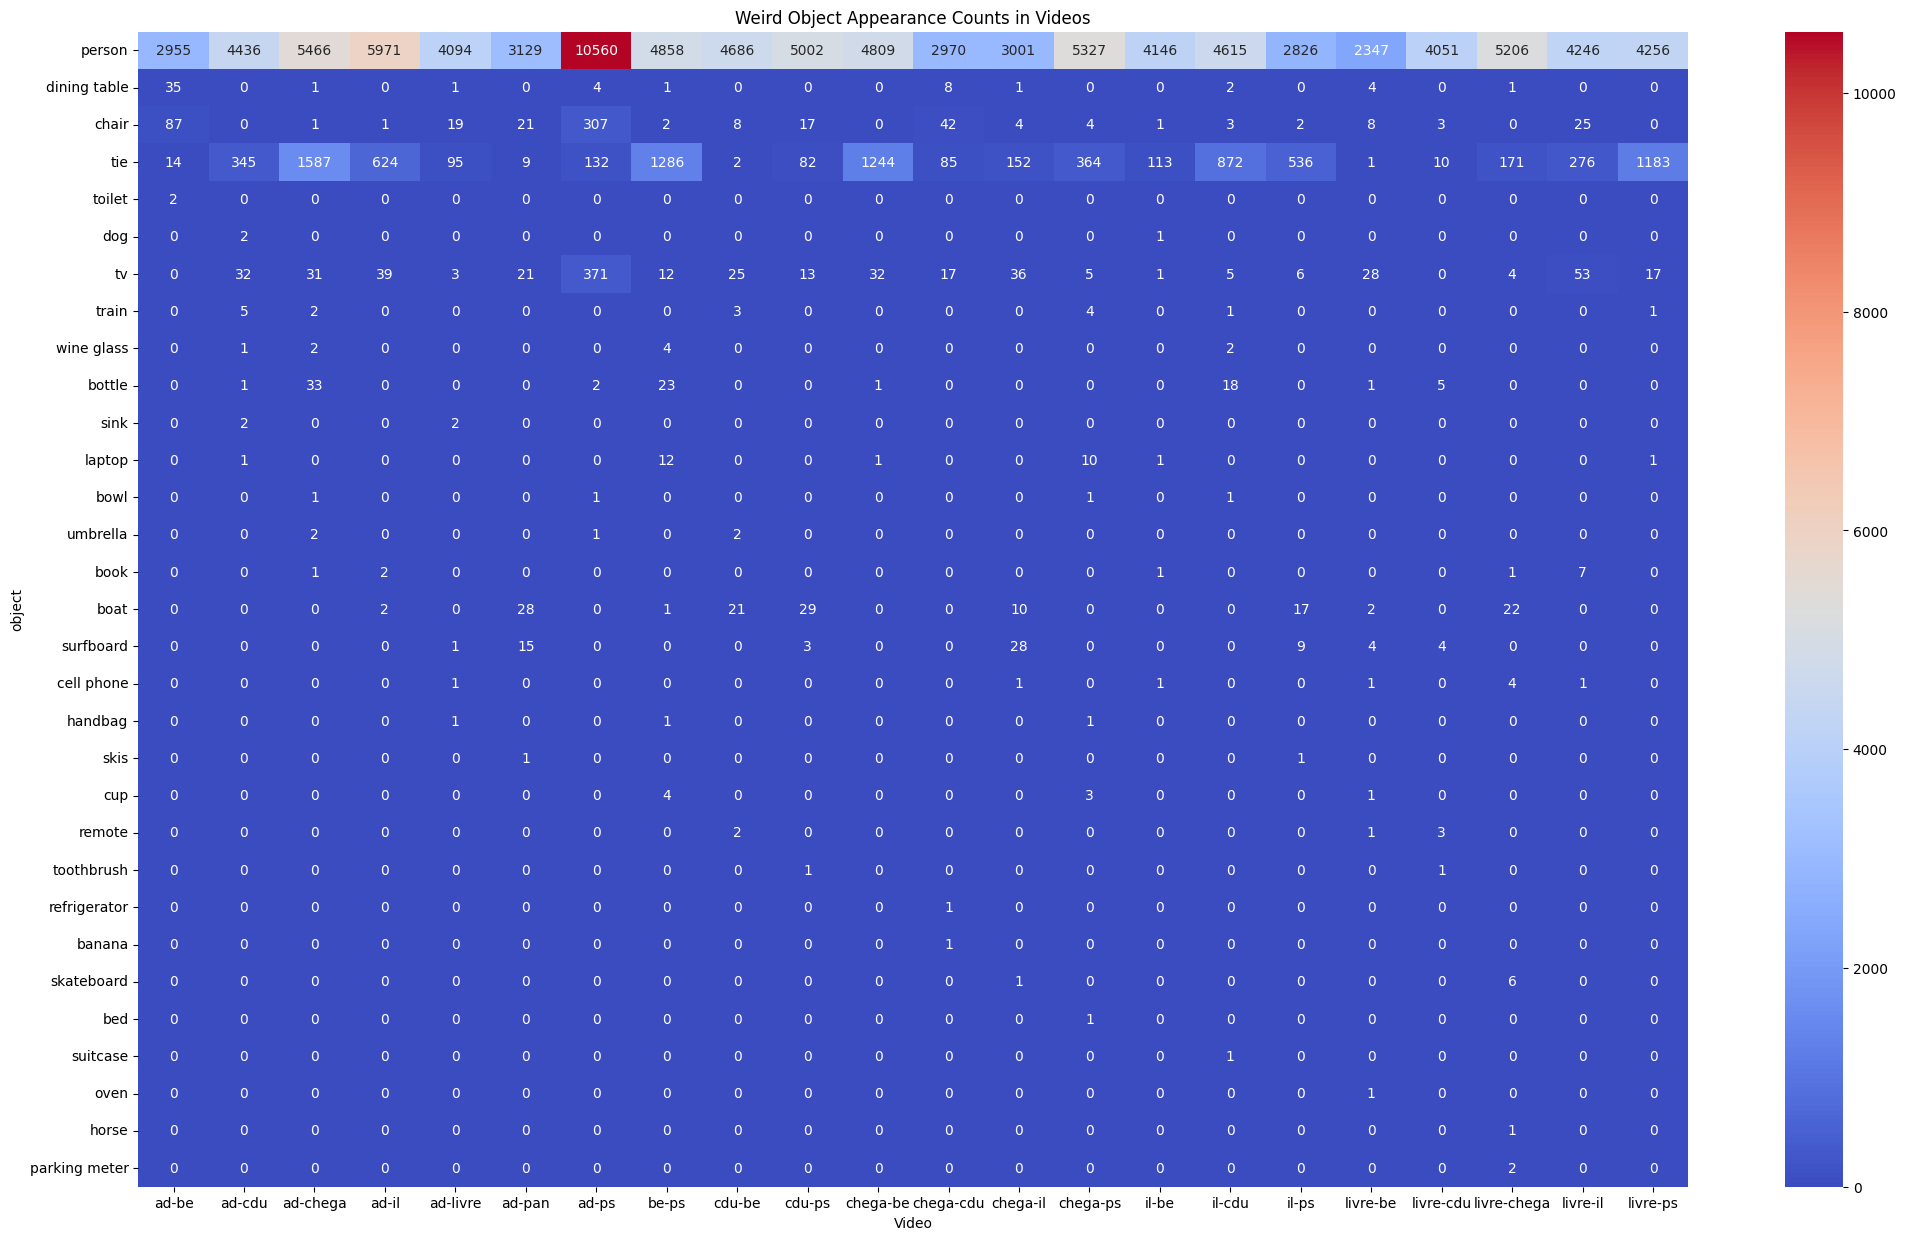

In [46]:
videos = sorted(set([video for video, _ in sum(object_frame_mapping.values(), [])]))

# Initialize an empty dictionary to store object counts per video
object_counts = {video: {obj: 0 for obj in object_frame_mapping.keys()} for video in videos}

# Populate object counts
for obj, video_frames in object_frame_mapping.items():
    for video, frame in video_frames:
        object_counts[video][obj] += 1

# Convert object_counts to a DataFrame
df_counts = pd.DataFrame(object_counts)

# Plot heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(df_counts, cmap="coolwarm", cbar=True, annot=True, fmt='g')
plt.xlabel('Video')
plt.ylabel('object')
plt.title('Weird Object Appearance Counts in Videos')
plt.show()